In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv('Pak_Covid Data.csv')

In [32]:
df

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2/26/2020,1.0,0.0,0.0,China,Islamabad Capital Territory,Islamabad
1,2/26/2020,2.0,0.0,0.0,Iran/Taftan,Sindh,Karachi
2,2/29/2020,1.0,0.0,0.0,China,Islamabad Capital Territory,Islamabad
3,2/29/2020,1.0,0.0,0.0,Iran/Taftan,Sindh,Karachi
4,3/2/2020,NaN,0.0,0.0,NaN,Gilgit-Baltistan,Gilgit
...,...,...,...,...,...,...,...
845,4/19/2020,3.0,0.0,0.0,Local - Social Contact,Punjab,Sheikhupura
846,4/19/2020,1.0,0.0,0.0,Local - Social Contact,Punjab,Bhakhar
847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
848,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            848 non-null    object 
 1   Cases           830 non-null    float64
 2   Deaths          822 non-null    float64
 3   Recovered       832 non-null    float64
 4   Travel_history  823 non-null    object 
 5   Province        796 non-null    object 
 6   City            821 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.6+ KB


In [34]:
data=df.iloc[:848,0:]

In [35]:
data

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2/26/2020,1.0,0.0,0.0,China,Islamabad Capital Territory,Islamabad
1,2/26/2020,2.0,0.0,0.0,Iran/Taftan,Sindh,Karachi
2,2/29/2020,1.0,0.0,0.0,China,Islamabad Capital Territory,Islamabad
3,2/29/2020,1.0,0.0,0.0,Iran/Taftan,Sindh,Karachi
4,3/2/2020,NaN,0.0,0.0,NaN,Gilgit-Baltistan,Gilgit
...,...,...,...,...,...,...,...
843,4/19/2020,5.0,0.0,0.0,Local - Social Contact,Punjab,Khanewal
844,4/19/2020,5.0,0.0,0.0,Local - Social Contact,Punjab,Toba Tek Singh
845,4/19/2020,3.0,0.0,0.0,Local - Social Contact,Punjab,Sheikhupura
846,4/19/2020,1.0,0.0,0.0,Local - Social Contact,Punjab,Bhakhar


In [36]:
# to find the missing values in the columns and rows
# isnull command is used to find missing values it turnes all missing vlaues TRUE and present values to FALSE
data.isnull()

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...
843,False,False,False,False,False,False,False
844,False,False,False,False,False,False,False
845,False,False,False,False,False,False,False
846,False,False,False,False,False,False,False


In [37]:
# Now summing all the missing values
data.isnull().sum().sort_values(ascending=False) # by default it sums according to columns and in ascending order so if we want to sum according to rows then use .sum(axis=1)

Province          52
City              27
Deaths            27
Travel_history    25
Cases             19
Recovered         17
Date               1
dtype: int64

In [38]:
# Getting the missing values in percentage
(data.isnull().sum()/len(df))*100

Date              0.117647
Cases             2.235294
Deaths            3.176471
Recovered         2.000000
Travel_history    2.941176
Province          6.117647
City              3.176471
dtype: float64

In [39]:
data

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2/26/2020,1.0,0.0,0.0,China,Islamabad Capital Territory,Islamabad
1,2/26/2020,2.0,0.0,0.0,Iran/Taftan,Sindh,Karachi
2,2/29/2020,1.0,0.0,0.0,China,Islamabad Capital Territory,Islamabad
3,2/29/2020,1.0,0.0,0.0,Iran/Taftan,Sindh,Karachi
4,3/2/2020,NaN,0.0,0.0,NaN,Gilgit-Baltistan,Gilgit
...,...,...,...,...,...,...,...
843,4/19/2020,5.0,0.0,0.0,Local - Social Contact,Punjab,Khanewal
844,4/19/2020,5.0,0.0,0.0,Local - Social Contact,Punjab,Toba Tek Singh
845,4/19/2020,3.0,0.0,0.0,Local - Social Contact,Punjab,Sheikhupura
846,4/19/2020,1.0,0.0,0.0,Local - Social Contact,Punjab,Bhakhar


In [40]:
# the data according to days
data.groupby('Date')['Cases'].sum()

Date
2/26/2020      3.0
2/29/2020      2.0
3/10/2020      2.0
3/11/2020      1.0
3/12/2020      1.0
3/13/2020      9.0
3/15/2020     34.0
3/16/2020    150.0
3/17/2020     51.0
3/18/2020     56.0
3/19/2020    154.0
3/2/2020       0.0
3/20/2020     45.0
3/21/2020    131.0
3/22/2020    110.0
3/23/2020     82.0
3/24/2020     93.0
3/25/2020    109.0
3/26/2020    131.0
3/27/2020    122.0
3/28/2020    184.0
3/29/2020     87.0
3/30/2020    145.0
3/31/2020    223.0
3/6/2020       0.0
3/7/2020       0.0
3/9/2020       9.0
4/1/2020     260.0
4/10/2020    156.0
4/11/2020    297.0
4/12/2020    253.0
4/13/2020    173.0
4/14/2020    628.0
4/15/2020    321.0
4/16/2020    756.0
4/17/2020    512.0
4/18/2020    265.0
4/19/2020    568.0
4/2/2020     144.0
4/3/2020     239.0
4/4/2020      79.0
4/5/2020     180.0
4/6/2020     249.0
4/7/2020     107.0
4/8/2020     337.0
4/9/2020     882.0
Name: Cases, dtype: float64

In [44]:
#Now Checking the cases that are lead to Death
data['Deaths']>0

0      False
1      False
2      False
3      False
4      False
       ...  
843    False
844    False
845    False
846    False
847    False
Name: Deaths, Length: 848, dtype: bool

In [49]:
# Removing 0 recovered cases from the dataset
data[data['Deaths']>=1]

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
22,3/15/2020,1.0,1.0,0.0,NaN,Khyber Pakhtunkhwa,Mardan
44,3/18/2020,1.0,1.0,0.0,KSA,Khyber Pakhtunkhwa,Mardan
45,3/18/2020,1.0,1.0,0.0,Unknown,Khyber Pakhtunkhwa,Hangu
57,3/20/2020,NaN,1.0,0.0,NaN,Sindh,Karachi
90,3/22/2020,4.0,1.0,0.0,Unknown,Baluchistan,Quetta
...,...,...,...,...,...,...,...
808,4/18/2020,138.0,1.0,11.0,Unknown,Sindh,Karachi
810,4/18/2020,84.0,5.0,0.0,Unknown,Khyber Pakhtunkhwa,Peshawar
814,4/18/2020,5.0,4.0,0.0,Local - Social Contact,Punjab,Lahore
822,4/19/2020,182.0,8.0,0.0,Unknown,Sindh,Karachi


In [53]:
M=data[data['Deaths']>=1].groupby('Date')['Cases'].sum()

In [54]:
M

Date
3/15/2020      1.0
3/18/2020      2.0
3/20/2020      0.0
3/22/2020      4.0
3/23/2020     16.0
3/24/2020      0.0
3/26/2020      7.0
3/27/2020     30.0
3/28/2020     26.0
3/29/2020     36.0
3/30/2020     21.0
3/31/2020      0.0
4/1/2020      41.0
4/10/2020     89.0
4/11/2020    126.0
4/12/2020    122.0
4/13/2020     40.0
4/14/2020    123.0
4/15/2020    165.0
4/16/2020    117.0
4/17/2020    147.0
4/18/2020    236.0
4/19/2020    242.0
4/2/2020      35.0
4/3/2020      52.0
4/4/2020      36.0
4/5/2020      45.0
4/6/2020      71.0
4/7/2020      62.0
4/8/2020     151.0
4/9/2020     326.0
Name: Cases, dtype: float64

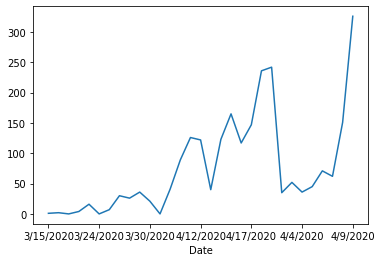

In [55]:
# Analyzing Deaths with respect to Days
M.plot.line()
plt.show()

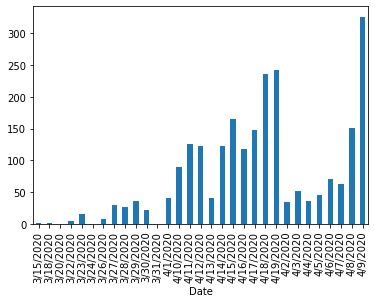

In [57]:
M.plot.bar()
plt.show()

In [64]:
#Affected Peoples who have a travel history
y1=data.groupby('Travel_history')['Cases'].sum()
y1


Travel_history
China                         2.0
Dubai                         1.0
India                         2.0
International Passenger      30.0
Iran/Taftan                 969.0
Jail                        101.0
KSA                           6.0
Local - Covid Relative        1.0
Local - Social Contact     4279.0
Syria                         6.0
Tableeghi Jamaat           1018.0
Tableegi Jamaat              19.0
UK                            5.0
USA                           1.0
Unknown                    1819.0
Name: Cases, dtype: float64

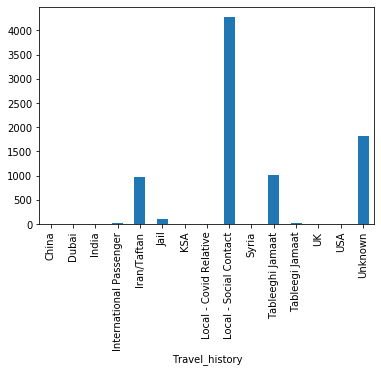

In [65]:
y1.plot.bar()
plt.show()

In [76]:
#Analyzing the cases according to Cities 
y2=data.groupby('City')['Cases'].sum()
y2

City
Abbottabad        24.0
Astore            13.0
Attock            15.0
Badin              4.0
Bahawal Nagar     21.0
                  ... 
Toba Tek Singh     7.0
Torghar            2.0
Trarkhel           1.0
Umerkot            1.0
Vehari            72.0
Name: Cases, Length: 105, dtype: float64

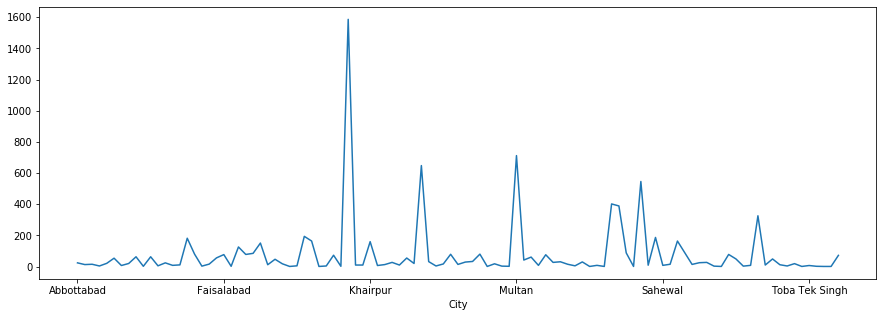

In [74]:
y2.plot.line(figsize=(15,5))
plt.show()

In [70]:
#Analyzing Cases According to Provinces
y3=data.groupby('Province')['Cases'].sum()
y3

Province
Azad Jummu Kashmir                      44.0
Baluchistan                            401.0
Federal Administration Tribal Area      42.0
Gilgit-Baltistan                       260.0
Islamabad Capital Territory            146.0
Khyber Pakhtunkhwa                     989.0
Punjab                                3718.0
Sindh                                 2570.0
khyber Pakhtunkhwa                       0.0
Name: Cases, dtype: float64

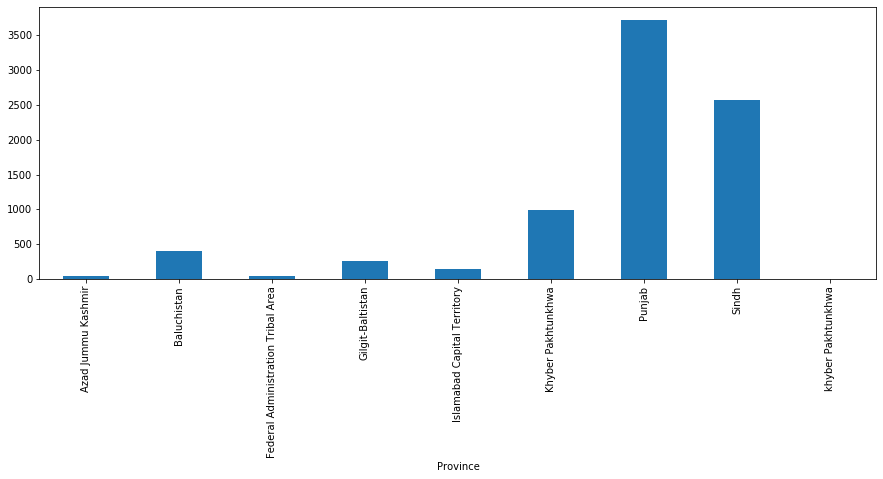

In [72]:
y3.plot.bar(figsize=(15,5))
plt.show()

In [78]:
# Total Cases that are not alive
data[data['Deaths']>=1]['Cases'].sum()

2369.0